# Financial time series

In [2]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
filename = 'yahoo_eod.csv'

In [4]:
f = open(filename, 'r')
f.readlines()[:5]

['Date,SPY,MSFT,INTC,GS,AMZN,AAPL,.VIX\n',
 '04/01/2010,113.330002,30.950001,20.879999,173.080002,133.899994,30.572857,20.040001\n',
 '05/01/2010,113.629997,30.959999,20.870001,176.139999,134.690002,30.625713,19.35\n',
 '06/01/2010,113.709999,30.77,20.799999,174.259995,132.25,30.138571,19.16\n',
 '07/01/2010,114.190002,30.450001,20.6,177.669998,130,30.082857,19.059999\n']

In [14]:
data = pd.read_csv(filename,
                   dayfirst=True,
                   index_col=0,
                   parse_dates=True
                  )
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2334 entries, 2010-01-04 to 2019-04-11
Data columns (total 7 columns):
SPY     2334 non-null float64
MSFT    2334 non-null float64
INTC    2334 non-null float64
GS      2334 non-null float64
AMZN    2334 non-null float64
AAPL    2334 non-null float64
.VIX    2334 non-null float64
dtypes: float64(7)
memory usage: 145.9 KB


In [15]:
data.head()

,SPY,MSFT,INTC,GS,AMZN,AAPL,.VIX
Date,,,,,,,
2010-01-04,113.330002,30.950001,20.879999,173.080002,133.899994,30.572857,20.040001
2010-01-05,113.629997,30.959999,20.870001,176.139999,134.690002,30.625713,19.350000
2010-01-06,113.709999,30.770000,20.799999,174.259995,132.250000,30.138571,19.160000
2010-01-07,114.190002,30.450001,20.600000,177.669998,130.000000,30.082857,19.059999
2010-01-08,114.570000,30.660000,20.830000,174.309998,133.520004,30.282858,18.129999


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016AAB021550>,
      dtype=object)

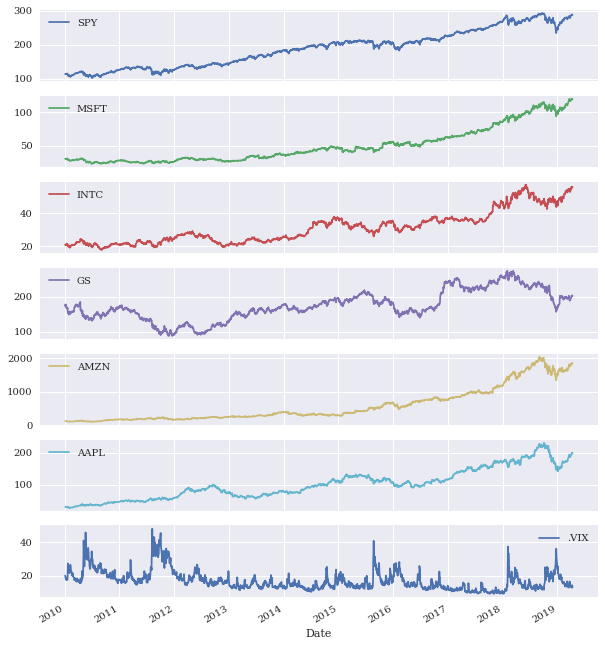

In [17]:
data.plot(figsize=(10, 12), subplots=True)

In [19]:
instruments = ['SPDR S&P 500 ETF Trust',
               'Microsoft Stock',
               'Intel Stock',
               'Goldman Sachs Stock',
               'Amazon Stock',
               'Apple Stock',
               'VIX Volatility Index'
              ]

for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

SPY      | SPDR S&P 500 ETF Trust
MSFT     | Microsoft Stock
INTC     | Intel Stock
GS       | Goldman Sachs Stock
AMZN     | Amazon Stock
AAPL     | Apple Stock
.VIX     | VIX Volatility Index


In [20]:
data.describe().round(2)

,SPY,MSFT,INTC,GS,AMZN,AAPL,.VIX
count,2334.00,2334.00,2334.00,2334.00,2334.00,2334.00,2334.00
mean,188.35,49.95,31.02,173.46,586.32,101.66,16.99
std,53.31,25.85,9.57,42.53,500.98,47.83,5.78
min,102.20,23.01,17.67,87.70,108.61,27.44,9.14
25%,136.04,29.09,22.84,149.08,220.02,62.64,13.08
50%,193.53,42.11,29.16,166.86,346.42,95.64,15.57
75%,225.12,62.27,35.72,201.13,809.55,128.69,19.09
max,293.58,120.33,57.08,273.38,2039.51,232.07,48.00


In [21]:
data.aggregate([min,
                np.mean,
                np.std,
                np.median,
                max
               ]) # pass custom functions per column

,SPY,MSFT,INTC,GS,AMZN,AAPL,.VIX
min,102.199997,23.010000,17.670000,87.699997,108.610001,27.435715,9.140000
mean,188.353132,49.949760,31.015124,173.462738,586.318878,101.658191,16.994229
std,53.314193,25.851481,9.573786,42.525093,500.983611,47.830234,5.781961
median,193.534996,42.114999,29.165000,166.864998,346.415008,95.642143,15.570000
max,293.579987,120.330002,57.080002,273.380005,2039.510010,232.070007,48.000000


In [22]:
data.diff().head()

,SPY,MSFT,INTC,GS,AMZN,AAPL,.VIX
Date,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.299995,0.009998,-0.009998,3.059997,0.790008,0.052856,-0.690001
2010-01-06,0.080002,-0.189999,-0.070002,-1.880004,-2.440002,-0.487142,-0.190000
2010-01-07,0.480003,-0.319999,-0.199999,3.410003,-2.250000,-0.055714,-0.100001
2010-01-08,0.379998,0.209999,0.230000,-3.360000,3.520004,0.200001,-0.930000


In [23]:
data.diff().mean()

SPY     0.074959
MSFT    0.038311
INTC    0.014968
GS      0.012752
AMZN    0.733035
AAPL    0.072172
.VIX   -0.003009
dtype: float64

In [24]:
data.pct_change().round(3).head()

,SPY,MSFT,INTC,GS,AMZN,AAPL,.VIX
Date,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.003,0.000,-0.000,0.018,0.006,0.002,-0.034
2010-01-06,0.001,-0.006,-0.003,-0.011,-0.018,-0.016,-0.010
2010-01-07,0.004,-0.010,-0.010,0.020,-0.017,-0.002,-0.005
2010-01-08,0.003,0.007,0.011,-0.019,0.027,0.007,-0.049


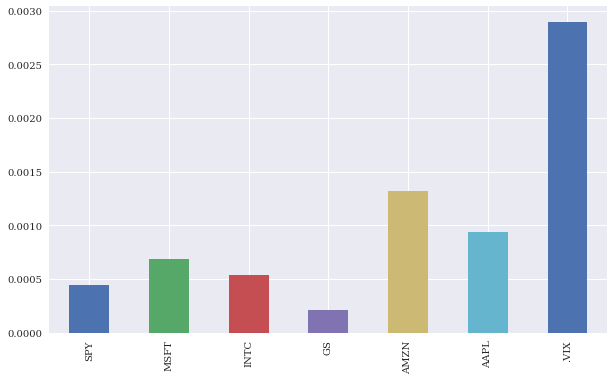

In [25]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6))

In [26]:
rets = np.log(data / data.shift(1))

rets.head().round(3)

,SPY,MSFT,INTC,GS,AMZN,AAPL,.VIX
Date,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.003,0.000,-0.000,0.018,0.006,0.002,-0.035
2010-01-06,0.001,-0.006,-0.003,-0.011,-0.018,-0.016,-0.010
2010-01-07,0.004,-0.010,-0.010,0.019,-0.017,-0.002,-0.005
2010-01-08,0.003,0.007,0.011,-0.019,0.027,0.007,-0.050


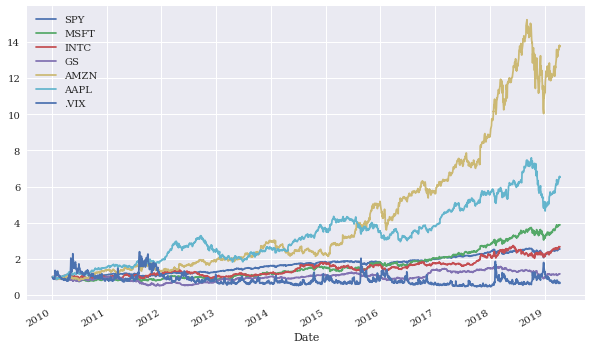

In [28]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))